In [1]:
!pip install pandas scikit-learn numpy matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset (update the path as needed)
df = pd.read_csv('Amazon Reviews.csv')

# Display the first few rows of the dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Drop missing values
df = df.dropna()

# Select the relevant columns
df = df[['Text', 'Score']]

# Convert 'Score' to sentiment labels
def label_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['Sentiment'] = df['Score'].apply(label_sentiment)

# Clean text function to remove special characters and convert to lowercase
import re
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the text cleaning function
df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [5]:
X = df['Cleaned_Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
classifier = LogisticRegression(max_iter=2000)  # Increase the number of iterations
classifier.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=2000)

In [9]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test data
y_pred = classifier.predict(X_test_vectorized)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8934298607506971

Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.75      0.78     16452
     neutral       0.61      0.40      0.48      8460
    positive       0.93      0.97      0.95     88769

    accuracy                           0.89    113681
   macro avg       0.78      0.71      0.73    113681
weighted avg       0.88      0.89      0.89    113681



Class distribution in the entire dataset:
Sentiment
positive    443756
negative     82007
neutral      42638
Name: count, dtype: int64


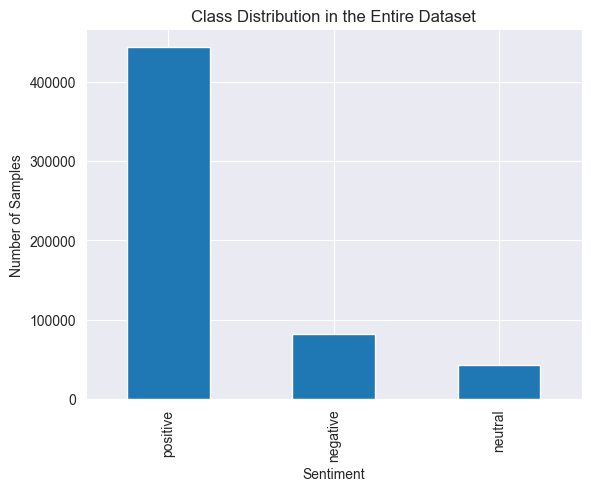

In [10]:
print("Class distribution in the entire dataset:")
print(df['Sentiment'].value_counts())

# Visualize the distribution as a bar chart
df['Sentiment'].value_counts().plot(kind='bar', title='Class Distribution in the Entire Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.show()

Class distribution in the training data:
Sentiment
positive    354987
negative     65555
neutral      34178
Name: count, dtype: int64


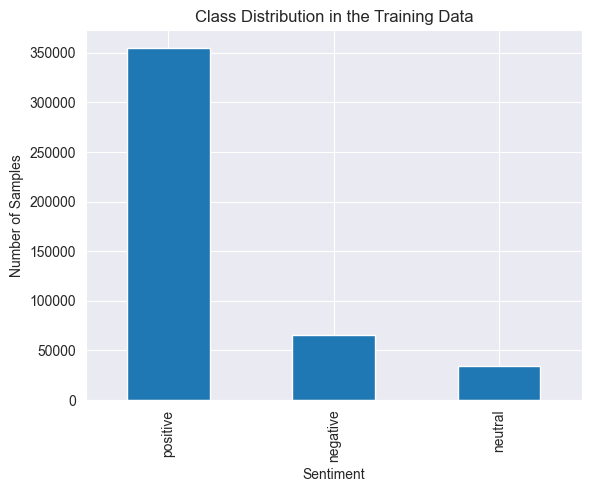

In [11]:
print("Class distribution in the training data:")
print(y_train.value_counts())

# Visualize the distribution as a bar chart
y_train.value_counts().plot(kind='bar', title='Class Distribution in the Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.show()

In [21]:
from sklearn.utils import resample

# Separate the dataset by class
positive_class = df[df['Sentiment'] == 'positive']
negative_class = df[df['Sentiment'] == 'negative']
neutral_class = df[df['Sentiment'] == 'neutral']

# Determine the size for resampling (using the minority class size)
resample_size = min(len(positive_class), len(negative_class), len(neutral_class))

# Resample each class to match the size of the smallest class
positive_class_resampled = resample(
    positive_class,
    replace=False,  # sample without replacement
    n_samples=resample_size,  # match the minority class size
    random_state=42  # for reproducibility
)

negative_class_resampled = resample(
    negative_class,
    replace=False,  # sample without replacement
    n_samples=resample_size,  # match the minority class size
    random_state=42  # for reproducibility
)

neutral_class_resampled = resample(
    neutral_class,
    replace=False,  # sample without replacement
    n_samples=resample_size,  # match the minority class size
    random_state=42  # for reproducibility
)

# Combine the resampled classes
balanced_df = pd.concat([positive_class_resampled, negative_class_resampled, neutral_class_resampled])

# Shuffle the combined dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the class distribution after resampling
print("Class distribution after resampling:")
print(balanced_df['Sentiment'].value_counts())

Class distribution after resampling:
Sentiment
positive    42638
neutral     42638
negative    42638
Name: count, dtype: int64


Accuracy: 0.7588633076652465

Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.76      0.77      8634
     neutral       0.70      0.70      0.70      8576
    positive       0.81      0.82      0.81      8373

    accuracy                           0.76     25583
   macro avg       0.76      0.76      0.76     25583
weighted avg       0.76      0.76      0.76     25583


Confusion Matrix:
 [[6875  461 1037]
 [ 539 6572 1523]
 [1107 1502 5967]]


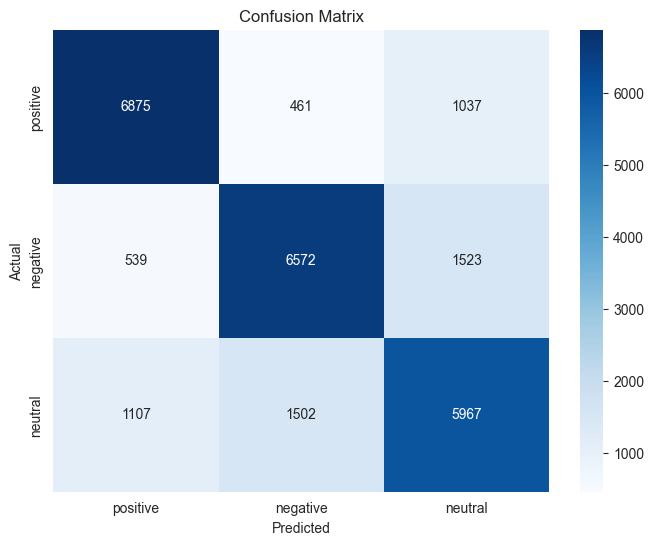

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the balanced dataset into training and testing sets
X_balanced = balanced_df['Cleaned_Text']
y_balanced = balanced_df['Sentiment']

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_balanced_vectorized = vectorizer.fit_transform(X_balanced)

# Split into training and testing sets (80% train, 20% test)
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced_vectorized, y_balanced, test_size=0.2, random_state=42
)

# Initialize and train the Logistic Regression model
classifier_balanced = LogisticRegression(max_iter=5000, class_weight='balanced')
classifier_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred_balanced = classifier_balanced.predict(X_test_balanced)

# Print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test_balanced, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test_balanced, y_pred_balanced))

# Print the confusion matrix
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced, labels=['positive', 'negative', 'neutral'])
print("\nConfusion Matrix:\n", conf_matrix_balanced)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative', 'neutral'],
            yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
import pickle

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Save the trained model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)
